In [1]:
import glob
import mgkit.taxon
from __future__ import division
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import mgkit.taxon
from scipy import stats
from __future__ import division
from matplotlib.font_manager import FontProperties
import glob
from time import sleep
import csv
import HTSeq
import mgkit
import mgkit.net.uniprot


#Get the True profile first

In [2]:
Genome_EC_positions = {} #Genome; {112-156:2.3.4.1,}

position = 0
EC = 0
genome = 0
for cfile in glob.glob("./Genomes/*.gbfull"):
    genome = cfile.split('/')[2].replace('.gbfull','')
    print genome
    for line in open(cfile,'r'):
        try:
            timber = line.split(' ')
            #print timber
            if timber[5] == 'CDS':
                position = timber[18].replace('\n','')
                if position.startwith('complement'):
                    position = position.replace('complement(','').replace(')','')
            if "EC_number" in line:
                EC = line.replace(' ','').replace('/EC_number="','').replace('"\n','')
                if genome in Genome_EC_positions:
                    prev = Genome_EC_positions[genome]
                    prev[position] = EC
                    Genome_EC_positions[genome] = prev
                else:
                    prev = {}
                    prev[position] = EC
                    Genome_EC_positions[genome] = prev
        except:
            continue
            

NC_000117.1
NC_000868.1
NC_000908.2
NC_000909.1
NC_000915.1
NC_000916.1
NC_000917.1
NC_000918.1
NC_000919.1
NC_000961.1
NC_000963.1
NC_001263.1
NC_001318.1
NC_002179.2
NC_002488.3
NC_002528.1
NC_002570.2
NC_002578.1
NC_002607.1
NC_002620.2
NC_002663.1
NC_002677.1
NC_002678.2
NC_002689.2
NC_002696.2
NC_002754.1
NC_002771.1
NC_002928.3
NC_002929.2
NC_002932.3
NC_002935.2
NC_002936.3
NC_002937.3
NC_002939.5
NC_002940.2
NC_002946.2
NC_002947.4
NC_002967.9
NC_002976.3
NC_002977.6
NC_002978.6
NC_003030.1
NC_003047.1
NC_003112.2
NC_003155.5
NC_003197.1
NC_003212.1
NC_003272.1
NC_003295.1
NC_003317.1
NC_003361.3
NC_003364.1
NC_003413.1
NC_003454.1
NC_003551.1
NC_003869.1
NC_003888.3
NC_003901.1
NC_003910.7
NC_003911.12
NC_003912.7
NC_003919.1
NC_004113.1
NC_004129.6
NC_004193.1
NC_004310.3
NC_004337.2
NC_004342.2
NC_004350.2
NC_004368.1
NC_004369.1
NC_004432.1
NC_004463.1
NC_004557.1
NC_004567.2
NC_004572.3
NC_004578.1
NC_004603.1
NC_004757.1
NC_004829.2
NC_004842.2
NC_004917.1
NC_005027.1
NC_

In [3]:
Genome_EC_positions

{'NC_000868.1': {'1013300..1013968': '3.1.2.6',
  '1042366..1043421': '3.5.1.16',
  '1055079..1056002': '3.1.26.11',
  '1065075..1065737': '2.7.4.3',
  '1093282..1093824': '2.7.4.9',
  '1100500..1101045': '2.7.4.14',
  '1135723..1136280': '5.1.3.13',
  '1163539..1163922': '1.6.5.3',
  '1164200..1165639': '1.6.5.3',
  '1187575..1188306': '3.1.3.70',
  '1212050..1213402': '4.3.2.2',
  '1223311..1226955': '5.99.1.3',
  '1257727..1258335': '1.2.7.8',
  '1263198..1263932': '2.1.1.148',
  '1290539..1291906': '6.1.1.11',
  '1302707..1304410': '2.2.1.6',
  '1305441..1306901': '2.3.3.13',
  '1306942..1308213': '4.2.1.33',
  '1308210..1308704': '4.2.1.33',
  '1311313..1312968': '4.2.1.9',
  '1326399..1327565': '2.3.1.9',
  '1335867..1337369': '6.1.1.20',
  '1337385..1339055': '6.1.1.20',
  '1359729..1361162': '6.1.1.16',
  '138044..139387': '3.5.2.6',
  '1401264..1402271': '1.1.1.26',
  '1409207..1410565': '2.7.1.146',
  '1500164..1501615': '3.2.1.23',
  '150138..150851': '6.3.4.15',
  '1570457.

In [4]:
EC2_lengths = {}
EC3_lengths = {}

for k,v in Genome_EC_positions.iteritems():
    for place, EC in v.iteritems():
        points = EC.split('.')
        p2 = points[0] + '.' + points[1] + '.-'
        p3 = points[0] + '.' + points[1] + '.' + points[2]  + '.-'
        #print place
        if 'join' in place or '<' in place or '>' in place:
            continue
        elif place.startswith('complement'):
            places = place.replace('complement(','').replace(')','')
            places = places.split('..')
            #print places
            length = int(places[1]) - int(places[0])
        else:
            if '..' in place:
                places = place.split('..')
                length = int(places[1]) - int(places[0])
            elif ',' in place:
                places = place.split(",")
                print places
                length = int(places[1]) - int(places[0])
        if p2 in EC2_lengths:
            EC2_lengths[p2] += length
        else:
            EC2_lengths[p2] = length
        if p3 in EC3_lengths:
            EC3_lengths[p3] += length
        else:
            EC3_lengths[p3] = length

In [5]:
popping = []
for k, v in EC2_lengths.iteritems():
    timber = k.split('.')
    try:
        isit = int(timber[0])
        if isit > 6:
            popping.append(k)
        #print k
    except:
        popping.append(k)
        #print 'FAIL; ', k
        continue
    try:
        isit = int(timber[1])
        #print k
    except:
        popping.append(k)
        #print 'FAIL; ', k
        continue
    
for i in popping:
    if i in EC2_lengths: 
        del EC2_lengths[i]
    
    
    


In [6]:
EC2_lengths

{'1.1.-': 8196258,
 '1.10.-': 326654,
 '1.11.-': 635399,
 '1.12.-': 239374,
 '1.13.-': 387150,
 '1.14.-': 1244528,
 '1.15.-': 132778,
 '1.16.-': 102812,
 '1.17.-': 1815891,
 '1.18.-': 414751,
 '1.19.-': 1719,
 '1.2.-': 4994289,
 '1.20.-': 48679,
 '1.21.-': 25827,
 '1.3.-': 3099503,
 '1.4.-': 2552414,
 '1.5.-': 1176071,
 '1.6.-': 3287604,
 '1.7.-': 869131,
 '1.8.-': 1647083,
 '1.9.-': 573370,
 '1.97.-': 113942,
 '2.1.-': 5779950,
 '2.10.-': 2410,
 '2.2.-': 1617805,
 '2.3.-': 7387882,
 '2.4.-': 5608243,
 '2.5.-': 3948999,
 '2.6.-': 3011868,
 '2.7.-': 22141177,
 '2.8.-': 906577,
 '2.9.-': 99521,
 '3.1.-': 6911033,
 '3.11.-': 9153,
 '3.13.-': 12464,
 '3.2.-': 2928489,
 '3.3.-': 287755,
 '3.4.-': 5825140,
 '3.5.-': 5605337,
 '3.6.-': 7119946,
 '3.7.-': 102846,
 '3.8.-': 88491,
 '3.9.-': 338,
 '4.1.-': 5220660,
 '4.2.-': 7620270,
 '4.3.-': 1642220,
 '4.4.-': 404557,
 '4.6.-': 354862,
 '4.99.-': 268001,
 '5.1.-': 1975216,
 '5.2.-': 435033,
 '5.3.-': 1882212,
 '5.4.-': 2539251,
 '5.5.-': 78021

In [7]:
popping = []
for k, v in EC3_lengths.iteritems():
    timber = k.split('.')
    try:
        isit = int(timber[0])
        if isit > 6:
            popping.append(k)
        #print k
    except:
        popping.append(k)
        #print 'FAIL; ', k
        continue
    try:
        isit = int(timber[1])
        #print k
    except:
        popping.append(k)
        #print 'FAIL; ', k
        continue
    try:
        isit = int(timber[2])
        #print k
    except:
        popping.append(k)
        #print 'FAIL; ', k
        continue
    
for i in popping:
    if i in EC3_lengths: 
        del EC3_lengths[i]
    
    
    


In [8]:
EC3_lengths

{'1.1.1.-': 7187385,
 '1.1.2.-': 211063,
 '1.1.3.-': 169169,
 '1.1.5.-': 357786,
 '1.1.99.-': 244192,
 '1.10.2.-': 115565,
 '1.10.3.-': 204302,
 '1.10.9.-': 482,
 '1.10.99.-': 6305,
 '1.11.1.-': 635399,
 '1.12.1.-': 17906,
 '1.12.2.-': 6449,
 '1.12.5.-': 28582,
 '1.12.7.-': 48500,
 '1.12.98.-': 64025,
 '1.12.99.-': 69797,
 '1.13.11.-': 325892,
 '1.13.12.-': 53526,
 '1.13.99.-': 1783,
 '1.14.11.-': 82145,
 '1.14.12.-': 100663,
 '1.14.13.-': 587261,
 '1.14.14.-': 158332,
 '1.14.15.-': 26651,
 '1.14.16.-': 40690,
 '1.14.17.-': 3021,
 '1.14.18.-': 6415,
 '1.14.19.-': 59472,
 '1.14.21.-': 905,
 '1.14.99.-': 93051,
 '1.15.1.-': 132778,
 '1.16.1.-': 61263,
 '1.16.3.-': 24527,
 '1.16.8.-': 15705,
 '1.17.1.-': 417177,
 '1.17.2.-': 4036,
 '1.17.3.-': 25311,
 '1.17.4.-': 1151898,
 '1.17.7.-': 211012,
 '1.17.99.-': 4737,
 '1.18.1.-': 145943,
 '1.18.6.-': 258313,
 '1.19.6.-': 1719,
 '1.2.1.-': 2861583,
 '1.2.2.-': 78697,
 '1.2.3.-': 25705,
 '1.2.4.-': 1003397,
 '1.2.5.-': 1745,
 '1.2.7.-': 653084,


#Produce profiles for each SRA

In [9]:
#Output = [contig] = [protein, bitscore, length hit]

temp = {}
for line in open('./BLAST_comb.output','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
blast = temp


temp = {}
for line in open('./DIAMOND.output.daa.m8','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
diamond = temp




temp = {}
for line in open('./USEARCH.output.2','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
usearch = temp



temp = {}
for line in open('SWIPE/SWIPE_comb.output','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
swipe = temp



temp = {}
for line in open('./RAPSEARCH.output.2.m8','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
rapsearch2 = temp

In [10]:
print 'Done'

Done


In [11]:
print len(blast)
print len(swipe)
print len(diamond)
print len(usearch)
print len(rapsearch2)

2653853
7649749
889354
1386720
246398


#Get unique gene list

In [6]:
import sys

In [13]:
outputting = open('Genes_list.txt','w')

for cdic in [blast,swipe,diamond,rapsearch2,usearch]:
    for k,v in cdic.iteritems():
        outputting.write(v[0] + '\n')
outputting.close()

#Map to EC

In [14]:
gene_EC = {}
total = 0
t1 = 0
t2 = 0

for line in open('UNIPROT_gene_INFO.txt','r'):
    if line.startswith('your'):
        continue
    else:
        gene = 0
        EC = ''
        timber = line.split('\t')
        gene = timber[0]
        EC = timber[15].split(';')
        if EC != '':
            gene_EC[gene] = EC
            total +=1
    

In [15]:
print total


455577


In [16]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(100, swipe.iteritems())

print n_items

[('NODE_905615_length_77_cov_1.064935---2', ['Q54XI9', 37.4, 33]), ('NODE_204986_length_185_cov_2.270270--+2', ['P06803', 31.6, 41]), ('NODE_204986_length_185_cov_2.270270--+3', ['P21561', 30.8, 40]), ('NODE_204986_length_185_cov_2.270270--+1', ['Q7W0R8', 137.9, 70]), ('NODE_1825241_length_95_cov_1.536842--+2', ['Q5REF4', 28.9, 28]), ('NODE_1371109_length_182_cov_2.225275---1', ['Q46B32', 33.9, 40]), ('NODE_2430468_length_72_cov_2.277778---3', ['Q90Y54', 31.6, 27]), ('NODE_2316705_length_103_cov_2.485437--+1', ['Q9M9B3', 29.3, 26]), ('NODE_662022_length_67_cov_2.223881--+2', ['Q8WP00', 29.3, 29]), ('NODE_354665_length_67_cov_1.567164--+1', ['O28852', 34.3, 29]), ('NODE_1699898_length_200_cov_2.445000--+1', ['P92172', 32.3, 44]), ('NODE_354665_length_67_cov_1.567164--+3', ['Q3T127', 29.6, 28]), ('NODE_2608676_length_84_cov_3.011905---1', ['P10163', 30.4, 33]), ('NODE_2117738_length_121_cov_1.595041--+1', ['P27744', 29.6, 47]), ('NODE_2608676_length_84_cov_3.011905---2', ['Q2LZ59', 32.0,

In [17]:
temp = {}
for contig, info in blast.iteritems():
    gene = info[0]
    space = int(abs(info[2]))
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.' + str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += space
                else:
                    temp[newEC] = space
            except:
                continue
    except:
        continue
        
blastec = temp


temp = {}
for contig, info in swipe.iteritems():
    gene = info[0]
    space = int(abs(info[2]))
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.' + str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += space
                else:
                    temp[newEC] = space
            except:
                continue
    except:
        continue
        
swipeec = temp


temp = {}
for contig, info in diamond.iteritems():
    gene = info[0]
    space = int(abs(info[2]))
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.' + str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += space
                else:
                    temp[newEC] = space
            except:
                continue
    except:
        continue
        
diamondec = temp


temp = {}
for contig, info in usearch.iteritems():
    gene = info[0]
    space = int(abs(info[2]))
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.' + str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += space
                else:
                    temp[newEC] = space
            except:
                continue
    except:
        continue
        
usearchec = temp


temp = {}
for contig, info in rapsearch2.iteritems():
    gene = info[0]
    space = int(abs(info[2]))
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.' + str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += space
                else:
                    temp[newEC] = space
            except:
                continue
    except:
        continue
        
rapsearch2ec = temp




In [18]:
print len(blastec)
print len(swipeec)
print len(diamondec)
print len(usearchec)
print len(rapsearch2ec)

65
65
62
64
64


In [19]:
len(swipe)

7649749

In [20]:
blastec

{'1.1.-': 7927566,
 '1.10.-': 416685,
 '1.11.-': 924445,
 '1.12.-': 323972,
 '1.13.-': 696455,
 '1.14.-': 2635169,
 '1.15.-': 133038,
 '1.16.-': 181427,
 '1.17.-': 1324715,
 '1.18.-': 464335,
 '1.2.-': 4344536,
 '1.20.-': 60205,
 '1.21.-': 89290,
 '1.22.-': 814,
 '1.23.-': 9746,
 '1.3.-': 3354301,
 '1.4.-': 1759303,
 '1.5.-': 1226231,
 '1.6.-': 2324527,
 '1.7.-': 1062020,
 '1.8.-': 1681044,
 '1.9.-': 351231,
 '1.97.-': 128770,
 '2.1.-': 9461669,
 '2.10.-': 115569,
 '2.2.-': 1284050,
 '2.3.-': 8466952,
 '2.4.-': 6764582,
 '2.5.-': 3755464,
 '2.6.-': 2581756,
 '2.7.-': 24135144,
 '2.8.-': 2459355,
 '2.9.-': 96403,
 '3.1.-': 12037674,
 '3.10.-': 3288,
 '3.11.-': 27020,
 '3.13.-': 12601,
 '3.2.-': 4092479,
 '3.3.-': 244127,
 '3.4.-': 10008794,
 '3.5.-': 5278820,
 '3.6.-': 14175458,
 '3.7.-': 206348,
 '3.8.-': 68112,
 '3.9.-': 10035,
 '4.1.-': 4749709,
 '4.2.-': 6435069,
 '4.3.-': 1489967,
 '4.4.-': 420204,
 '4.5.-': 9970,
 '4.6.-': 462855,
 '4.7.-': 14904,
 '4.99.-': 316912,
 '5.1.-': 2182

In [21]:
list_all_phylum = []

for k, v in usearchec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in diamondec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in swipeec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in blastec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in rapsearch2ec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        


In [22]:
print len(list_all_phylum)

65


In [23]:
blast_percent = {}
values = 0
for k, v in blastec.iteritems():
    values += v  
for k, v in blastec.iteritems():
    blast_percent[k] = (v/values)*100  
    
swipe_percent = {}
values = 0
for k, v in swipeec.iteritems():
    values += v  
for k, v in swipeec.iteritems():
    swipe_percent[k] = (v/values)*100  
    
diamond_percent = {}
values = 0
for k, v in diamondec.iteritems():
    values += v  
for k, v in diamondec.iteritems():
    diamond_percent[k] = (v/values)*100  
    
usearch_percent = {}
values = 0
for k, v in usearchec.iteritems():
    values += v  
for k, v in usearchec.iteritems():
    usearch_percent[k] = (v/values)*100  
    
rap_percent = {}
values = 0
for k, v in rapsearch2ec.iteritems():
    values += v  
for k, v in rapsearch2ec.iteritems():
    rap_percent[k] = (v/values)*100  

    
    
EC2_percent = {}
values = 0
for k, v in EC2_lengths.iteritems():
    values += v  
for k, v in EC2_lengths.iteritems():
    EC2_percent[k] = (v/values)*100 


In [24]:

combined_perc = {}

for phylum in list_all_phylum:

    if phylum in EC2_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(EC2_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [EC2_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
    
    if phylum in blast_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(blast_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [blast_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]

        
            
            
            
    if phylum in diamond_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(diamond_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [diamond_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
            
    if phylum in usearch_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(usearch_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [usearch_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
            
            
    if phylum in rap_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(rap_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [rap_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
            
            

            
            
            
            
    if phylum in swipe_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(swipe_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [swipe_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            

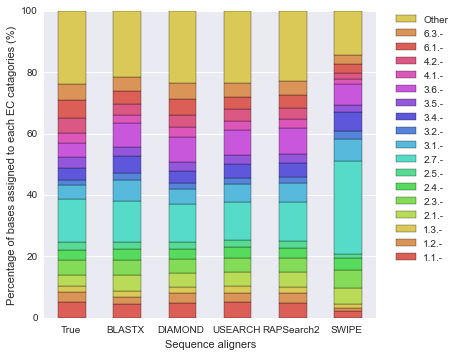

In [25]:
temp = {}
unknown = [0,0,0,0,0,0]
for k,v in combined_perc.iteritems():
    if sum(v) > 10:
        temp[k.capitalize()] = v
    else:
        t = []
        for i,l in zip(unknown,v):
            t.append(i+l)
        unknown = t

temp['Other'] = unknown

dataframe = pd.DataFrame(temp)
ax = dataframe.plot(kind='bar',stacked=True,legend=True, ylim=(0,100),color=sns.color_palette("hls", 15))

N = 6
ind = np.arange(N)
width = 0.35

    
plt.xlabel('Sequence aligners')
plt.ylabel('Percentage of bases assigned to each EC catagories (%)')
plt.xticks(ind+width/2. - 0.2,('True','BLASTX','DIAMOND','USEARCH','RAPSearch2','SWIPE'),rotation='horizontal')

handles, labels = ax.get_legend_handles_labels()


ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.gcf().subplots_adjust(right=0.7)

plt.savefig('EC2_analysis.pdf',format='pdf',dpi=1000000000)

In [26]:
outputting = open('EC_profiles_SimMeta_Percentages.txt','w')

outputting.write("EC,True,BLASTX,DIAMOND,USEARCH,RAPSearch2,SWIPE\n")
for k,v in combined_perc.iteritems():
    temp = k
    for i in v:
        temp = temp + ',' + str(i)
    outputting.write(temp + '\n')
    
outputting.close()

In [48]:
simple = EC2_lengths

swipev = blastec

unique = []
for i in swipev.keys():
    if i in unique:
        continue
    else:
        unique.append(i)
for i in simple.keys():
    if i in unique:
        continue
    else:
        unique.append(i)

obs2 = []
obs = {}
for i in unique:
    try:
        one = simple[i]
    except:
        one = 0
        
    try:
        two = swipev[i]
    except:
        two = 0
    obs[i] = [one,two]
    obs2.append([one,two])
 
#print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs2, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)   

outputting = open('EC_profiles_SimMeta_TrueAndBLAST_Raw.txt','w')

outputting.write("EC,True,SWIPE\n")
for k,v in obs.iteritems():
    outputting.write(k + ',' + str(v[0]) + ',' + str(v[1]) + '\n')
    
outputting.close()

Chi2 = 7852896.29751
P-value = 0.0


#Chi2 comparison

In [34]:
import scipy

#Scale to the minimum

simple = {}

spherical = {}


for k,v in combined_perc.iteritems():
        simple[k] = v[0]
        spherical[k] = v[5]
        


obs = []
for i in combined_perc.keys():
    add = simple[i] + spherical[i]
    if add >= 1:
        obs.append((simple[i],spherical[i]))
    
print 'LOLOLOLOL'
print obs
print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)

LOLOLOLOL
[(3.666200492766981, 5.192287872890987), (1.0261676118653076, 0.4115354578341443), (1.145559288290199, 0.5229195359245048), (4.5161549033597685, 7.044053786014757), (3.311444954466538, 1.5284541241460634), (5.9751389876241445, 2.885421649572705), (5.198855546924334, 2.1574657217474242), (4.383642175127616, 6.948910723814119), (1.0447385368780209, 0.4704663419380585), (3.5572873900564828, 3.6336996690753813), (3.694864339386439, 6.3718207790280506), (3.555444125213019, 2.190964045273121), (2.0853148218968496, 1.4142064615773078), (1.610637335523499, 0.9072097654893694), (0.7893994181372339, 1.4656499145009474), (1.1938799750675912, 0.6581387436438602), (2.5048351767292645, 1.3673241559568374), (3.167858682656547, 1.1701420335093848), (1.9660030667968988, 1.0456547169005639), (0.7459774011416977, 0.4077313823750998), (4.686105697956609, 6.152372883543195), (1.3838345698600039, 0.5010870438065445), (1.6189865767948408, 0.5699534430761845), (1.2528720616132016, 0.5709323023455967

#Why is SWIPE different?

In [40]:
print len(swipe)

7649749


In [41]:
genes = []

for k,v in swipe.iteritems():
    if v[0] in genes:
        continue
    else:
        genes.append(v[0])
print len(genes)

KeyboardInterrupt: 

In [69]:
for i in genes:
    print i

Q9D226
P20730
Q64507
Q9D5Z7
Q6S6W0
Q6L8H4
Q701N2
O04310
Q9BYP8
Q2TA51
Q62220
Q65169
Q6L8G8
Q6L8H1
Q9NAX4
P28968
P26371
O75690
P08399
Q1HVF7
Q6L8H2
P26372
Q701N4
Q59V01
Q6L8G9
Q6L8G5
Q66H38
Q3KSS4
P03211
P86966
P05790
Q69566
Q9BYR3
O53553
P14328
Q5STT6
Q27287
Q6PZE0
A8MXZ3
Q9BYR2
Q16UF8
Q4WLB9
A5A6P5
Q54GV8
P18165
Q6L8G4
O97388
Q6S4N8
Q9BYP9
Q9BYQ4
P15269
Q04537
P9WIE7
O75095
Q9HCJ5
P9WIG5
B1P0S1
Q03355
P05687
Q05049
P12347
A2Y5N0
P49749
P02734
Q8IUG1
Q03353
Q5AHC0
Q7KW14
Q9UBI9
Q9BYQ7
Q03293
P79377
P24856
P08674
Q9BQ66
Q99MX7
Q8UVY1
Q5ISE2
P05688
Q8WSW3
O16119
P68302
Q6J1T3
Q62424
Q9BYR4
P86857
P60371
P13729
Q54LH6
P69154
P18431
Q9BYR5
Q03828
P47179
P07663
P50496
Q09624
P55943
P31271
Q9BYQ5
Q05890
P80258
Q9IB50
Q9BYQ0
Q80V70
Q8N339
P13837
Q00130
Q9U620
P52722
P80593
Q55CB6
P34527
P92127
P80367
P21849
P60410
P75885
Q01642
P34504
P13709
Q01644
A8MTY7
P02804
Q9W4E2
P23490
Q9VAW5
A8MVA2
Q6XUW5
O45168
P50495
Q09662
Q4V7A5
P51902
P97334
Q7Z5P9
P11957
P80249
P30569
Q01645
P68504
Q26289
Q5GH67

Lots have GO terms but very few enzymes, causing the difference seen in the graph

#Raw numbers

In [21]:
EC2_lengths

{'1.1.-': 8196258,
 '1.10.-': 326654,
 '1.11.-': 635399,
 '1.12.-': 239374,
 '1.13.-': 387150,
 '1.14.-': 1244528,
 '1.15.-': 132778,
 '1.16.-': 102812,
 '1.17.-': 1815891,
 '1.18.-': 414751,
 '1.19.-': 1719,
 '1.2.-': 4994289,
 '1.20.-': 48679,
 '1.21.-': 25827,
 '1.3.-': 3099503,
 '1.4.-': 2552414,
 '1.5.-': 1176071,
 '1.6.-': 3287604,
 '1.7.-': 869131,
 '1.8.-': 1647083,
 '1.9.-': 573370,
 '1.97.-': 113942,
 '2.1.-': 5779950,
 '2.10.-': 2410,
 '2.2.-': 1617805,
 '2.3.-': 7387882,
 '2.4.-': 5608243,
 '2.5.-': 3948999,
 '2.6.-': 3011868,
 '2.7.-': 22141177,
 '2.8.-': 906577,
 '2.9.-': 99521,
 '3.1.-': 6911033,
 '3.11.-': 9153,
 '3.13.-': 12464,
 '3.2.-': 2928489,
 '3.3.-': 287755,
 '3.4.-': 5825140,
 '3.5.-': 5605337,
 '3.6.-': 7119946,
 '3.7.-': 102846,
 '3.8.-': 88491,
 '3.9.-': 338,
 '4.1.-': 5220660,
 '4.2.-': 7620270,
 '4.3.-': 1642220,
 '4.4.-': 404557,
 '4.6.-': 354862,
 '4.99.-': 268001,
 '5.1.-': 1975216,
 '5.2.-': 435033,
 '5.3.-': 1882212,
 '5.4.-': 2539251,
 '5.5.-': 78021

In [22]:
swipeec

{'1.1.-': 2305448,
 '1.10.-': 144196,
 '1.11.-': 518577,
 '1.12.-': 83363,
 '1.13.-': 228539,
 '1.14.-': 1566180,
 '1.15.-': 51033,
 '1.16.-': 73867,
 '1.17.-': 403429,
 '1.18.-': 188609,
 '1.2.-': 1250403,
 '1.20.-': 13671,
 '1.21.-': 28138,
 '1.22.-': 241,
 '1.23.-': 3760,
 '1.3.-': 1117377,
 '1.4.-': 609047,
 '1.5.-': 435698,
 '1.6.-': 1511208,
 '1.7.-': 319337,
 '1.8.-': 502736,
 '1.9.-': 159691,
 '1.97.-': 52281,
 '2.1.-': 5548431,
 '2.10.-': 119933,
 '2.2.-': 439763,
 '2.3.-': 6574369,
 '2.4.-': 3882938,
 '2.5.-': 1461110,
 '2.6.-': 718083,
 '2.7.-': 32536749,
 '2.8.-': 987727,
 '2.9.-': 53083,
 '3.1.-': 7425542,
 '3.10.-': 881,
 '3.11.-': 6713,
 '3.13.-': 3066,
 '3.2.-': 2766102,
 '3.3.-': 71100,
 '3.4.-': 6808869,
 '3.5.-': 2341244,
 '3.6.-': 7527211,
 '3.7.-': 58536,
 '3.8.-': 22342,
 '3.9.-': 2717,
 '4.1.-': 1633292,
 '4.2.-': 2224379,
 '4.3.-': 463676,
 '4.4.-': 110065,
 '4.5.-': 1564,
 '4.6.-': 587304,
 '4.7.-': 3846,
 '4.99.-': 133549,
 '5.1.-': 610093,
 '5.2.-': 590059,
 

In [28]:
import scipy

#Scale to the minimum

simple = EC2_lengths

swipev = swipeec



unique = []
for i in swipev.keys():
    if i in unique:
        continue
    else:
        unique.append(i)
for i in simple.keys():
    if i in unique:
        continue
    else:
        unique.append(i)


obs = []
for i in unique:
    try:
        one = simple[i]
    except:
        one = 0
        
    try:
        two = swipev[i]
    except:
        two = 0
    obs.append((one,two))
    
print 'LOLOLOLOL'
print obs
print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)

LOLOLOLOL
[(5779950, 5548431), (1617805, 439763), (287755, 71100), (0, 3846), (354862, 587304), (102812, 73867), (99521, 53083), (9420108, 3083335), (8196258, 2305448), (6911033, 7425542), (0, 241), (1647083, 502736), (869131, 319337), (573370, 159691), (338, 2717), (581833, 60516), (5605337, 2341244), (1042742, 276245), (3287604, 1511208), (9153, 6713), (0, 881), (5220660, 1633292), (132778, 51033), (78021, 45897), (1244528, 1566180), (113942, 52281), (239374, 83363), (1882212, 703281), (3948999, 1461110), (404557, 110065), (5608243, 3882938), (2539251, 969436), (4994289, 1250403), (387150, 228539), (12464, 3066), (3099503, 1117377), (435033, 590059), (1176071, 435698), (48679, 13671), (7387882, 6574369), (25827, 28138), (2181685, 535457), (414751, 188609), (2552414, 609047), (88491, 22342), (0, 3760), (102846, 58536), (1815891, 403429), (8144454, 2955033), (1642220, 463676), (1806032, 558787), (7119946, 7527211), (7620270, 2224379), (0, 1564), (1975216, 610093), (22141177, 32536749),

In [30]:
import scipy

#Scale to the minimum

simple = EC2_lengths

swipev = swipeec



unique = []
for i in swipev.keys():
    if i in unique:
        continue
    else:
        unique.append(i)
for i in simple.keys():
    if i in unique:
        continue
    else:
        unique.append(i)


obs = []
for i in unique:
    try:
        one = simple[i]
        two = swipev[i]
        add = one + two
        if add >= 1:
            obs.append((one,two))
    except:
        one = 0

    
print obs
print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)

[(5779950, 5548431), (1617805, 439763), (287755, 71100), (354862, 587304), (102812, 73867), (99521, 53083), (9420108, 3083335), (8196258, 2305448), (6911033, 7425542), (1647083, 502736), (869131, 319337), (573370, 159691), (338, 2717), (581833, 60516), (5605337, 2341244), (1042742, 276245), (3287604, 1511208), (9153, 6713), (5220660, 1633292), (132778, 51033), (78021, 45897), (1244528, 1566180), (113942, 52281), (239374, 83363), (1882212, 703281), (3948999, 1461110), (404557, 110065), (5608243, 3882938), (2539251, 969436), (4994289, 1250403), (387150, 228539), (12464, 3066), (3099503, 1117377), (435033, 590059), (1176071, 435698), (48679, 13671), (7387882, 6574369), (25827, 28138), (2181685, 535457), (414751, 188609), (2552414, 609047), (88491, 22342), (102846, 58536), (1815891, 403429), (8144454, 2955033), (1642220, 463676), (1806032, 558787), (7119946, 7527211), (7620270, 2224379), (1975216, 610093), (22141177, 32536749), (906577, 987727), (326654, 144196), (3011868, 718083), (2410, 

In [31]:
import scipy

#Scale to the minimum

simple = EC2_lengths

swipev = blastec



unique = []
for i in swipev.keys():
    if i in unique:
        continue
    else:
        unique.append(i)
for i in simple.keys():
    if i in unique:
        continue
    else:
        unique.append(i)


obs = []
for i in unique:
    try:
        one = simple[i]
        two = swipev[i]
        add = one + two
        if add >= 1:
            obs.append((one,two))
    except:
        one = 0

    
print obs
print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)

[(5779950, 9461669), (1617805, 1284050), (1806032, 1921973), (25827, 89290), (1882212, 1904152), (102812, 181427), (88491, 68112), (338, 10035), (9420108, 7645098), (8196258, 7927566), (6911033, 12037674), (404557, 420204), (869131, 1062020), (573370, 351231), (581833, 199987), (906577, 2459355), (1042742, 914788), (3287604, 2324527), (9153, 27020), (99521, 96403), (2539251, 2778921), (132778, 133038), (78021, 103136), (1244528, 2635169), (113942, 128770), (239374, 323972), (354862, 462855), (3948999, 3755464), (5608243, 6764582), (1647083, 1681044), (4994289, 4344536), (387150, 696455), (12464, 12601), (3099503, 3354301), (435033, 707033), (1176071, 1226231), (48679, 60205), (7387882, 8466952), (5220660, 4749709), (2181685, 1503653), (414751, 464335), (2552414, 1759303), (102846, 206348), (1815891, 1324715), (8144454, 7828534), (1642220, 1489967), (287755, 244127), (7119946, 14175458), (7620270, 6435069), (1975216, 2182588), (22141177, 24135144), (5605337, 5278820), (326654, 416685), 

#Based on number of genes

In [4]:
Genome_EC_positions = {} #Genome; {112-156:2.3.4.1,}

position = 0
EC = 0
genome = 0
for cfile in glob.glob("./Genomes/*.gbfull"):
    genome = cfile.split('/')[2].replace('.gbfull','')
    print genome
    for line in open(cfile,'r'):
        try:
            timber = line.split(' ')
            #print timber
            if timber[5] == 'CDS':
                position = timber[18].replace('\n','')
                if position.startwith('complement'):
                    position = position.replace('complement(','').replace(')','')
            if "EC_number" in line:
                EC = line.replace(' ','').replace('/EC_number="','').replace('"\n','')
                if genome in Genome_EC_positions:
                    prev = Genome_EC_positions[genome]
                    prev[position] = EC
                    Genome_EC_positions[genome] = prev
                else:
                    prev = {}
                    prev[position] = EC
                    Genome_EC_positions[genome] = prev
        except:
            continue
            

NC_000117.1
NC_000868.1
NC_000908.2
NC_000909.1
NC_000915.1
NC_000916.1
NC_000917.1
NC_000918.1
NC_000919.1
NC_000961.1
NC_000963.1
NC_001263.1
NC_001318.1
NC_002179.2
NC_002488.3
NC_002528.1
NC_002570.2
NC_002578.1
NC_002607.1
NC_002620.2
NC_002663.1
NC_002677.1
NC_002678.2
NC_002689.2
NC_002696.2
NC_002754.1
NC_002771.1
NC_002928.3
NC_002929.2
NC_002932.3
NC_002935.2
NC_002936.3
NC_002937.3
NC_002939.5
NC_002940.2
NC_002946.2
NC_002947.4
NC_002967.9
NC_002976.3
NC_002977.6
NC_002978.6
NC_003030.1
NC_003047.1
NC_003112.2
NC_003155.5
NC_003197.1
NC_003212.1
NC_003272.1
NC_003295.1
NC_003317.1
NC_003361.3
NC_003364.1
NC_003413.1
NC_003454.1
NC_003551.1
NC_003869.1
NC_003888.3
NC_003901.1
NC_003910.7
NC_003911.12
NC_003912.7
NC_003919.1
NC_004113.1
NC_004129.6
NC_004193.1
NC_004310.3
NC_004337.2
NC_004342.2
NC_004350.2
NC_004368.1
NC_004369.1
NC_004432.1
NC_004463.1
NC_004557.1
NC_004567.2
NC_004572.3
NC_004578.1
NC_004603.1
NC_004757.1
NC_004829.2
NC_004842.2
NC_004917.1
NC_005027.1
NC_

In [5]:
EC2_counts = {}
EC1_counts = {}

for k,v in Genome_EC_positions.iteritems():
    for place, EC in v.iteritems():
        points = EC.split('.')
        p1 = points[0] + '.-' 
        p2 = points[0] + '.' + points[1] + '.-'
        #print place
        if p2 in EC2_counts:
            EC2_counts[p2] += 1
        else:
            EC2_counts[p2] = 1
        if p1 in EC1_counts:
            EC1_counts[p1] += 1
        else:
            EC1_counts[p1] = 1


In [6]:
#Output = [contig] = [protein, bitscore, length hit]

temp = {}
for line in open('./BLAST_comb.output','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
blast = temp


temp = {}
for line in open('./DIAMOND.output.daa.m8','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
diamond = temp




temp = {}
for line in open('./USEARCH.output.2','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
usearch = temp



temp = {}
for line in open('SWIPE/SWIPE_comb.output','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
swipe = temp



temp = {}
for line in open('./RAPSEARCH.output.2.m8','r'):
    timber = line.replace('\n','').split('\t')
    try:
        contig = timber[0]
        protein = timber[1].split('|')[1]
        bit = float(timber[11])
        start = int(timber[6])
        end = int(timber[7])
        space = end-start
        if contig in temp:
            prev = temp[contig]
            if bit > prev[1]:
                temp[contig] = [protein,bit, space]
        else:
            temp[contig] = [protein,bit,space]
    except:
        continue
rapsearch2 = temp

In [7]:
print len(blast.keys())
print len(usearch.keys())
print len(diamond.keys())
print len(rapsearch2.keys())
print len(swipe.keys())


2653853
1386720
889354
246398
7649749


In [8]:
outputting = open('Genes_list.txt','w')

for cdic in [blast,swipe,diamond,rapsearch2,usearch]:
    for k,v in cdic.iteritems():
        outputting.write(v[0] + '\n')
outputting.close()

In [9]:
gene_EC = {}
total = 0
t1 = 0
t2 = 0

for line in open('UNIPROT_gene_INFO.txt','r'):
    if line.startswith('your'):
        continue
    else:
        gene = 0
        EC = ''
        timber = line.split('\t')
        gene = timber[0]
        EC = timber[15].split(';')
        if EC != '':
            gene_EC[gene] = EC
            total +=1
    

In [10]:
temp = {}
for contig, info in blast.iteritems():
    gene = info[0]
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.-' #+ str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += 1
                else:
                    temp[newEC] = 1
            except:
                continue
    except:
        continue
        
blastec = temp


temp = {}
for contig, info in swipe.iteritems():
    gene = info[0]
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.-' #+ str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += 1
                else:
                    temp[newEC] = 1
            except:
                continue
    except:
        continue
        
swipeec = temp


temp = {}
for contig, info in diamond.iteritems():
    gene = info[0]
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.-' #+ str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += 1
                else:
                    temp[newEC] = 1
            except:
                continue
    except:
        continue
        
diamondec = temp


temp = {}
for contig, info in usearch.iteritems():
    gene = info[0]
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.-' #+ str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += 1
                else:
                    temp[newEC] = 1
            except:
                continue
    except:
        continue
        
usearchec = temp


temp = {}
for contig, info in rapsearch2.iteritems():
    gene = info[0]
    try:
        ECs = gene_EC[gene]
        #print ECs
        for ECi in ECs:
            #print ECi
            splitting = ECi.split('.')
            #print splitting
            try:
                #print 'First'
                isit1 = int(splitting[0])
                isit2 = int(splitting[1])
                newEC = str(isit1) + '.-' #+ str(isit2) + '.-'
                #print newEC
                #print 'Second'
                if newEC in temp:
                    temp[newEC] += 1
                else:
                    temp[newEC] = 1
            except:
                continue
    except:
        continue
        
rapsearch2ec = temp




In [63]:
blast

KeyboardInterrupt: 

In [65]:
#Quick output raw information for Excel to create a table

outputting = open('Raw_gene_EC_counts.csv','w')

outputting.write('EC,Original,Blast,Diamond,Usearch,Rapsearch2,SWIPE\n')


EC_to_name = {
    '1.-': 'Oxidoreductases',
    '2.-': 'Transferases',
    '3.-': 'Hydrolases',
    '4.-': 'Lysases',
    '5.-': 'Isomerases',
    '6.-': 'Ligases',    
}




for ec in ['1.-','2.-','3.-','4.-','5.-','6.-']:
        blastk = blastec[ec]
        diamondk = diamondec[ec]
        usearchk = usearchec[ec]
        rapk = rapsearch2ec[ec]
        swipek = swipeec[ec]
        truek = EC1_counts[ec]
        outputting.write(EC_to_name[ec] + ',' + str(truek) + ',' + str(blastk)  + ',' + str(diamondk)  + ',' + str(usearchk) + ',' + str(rapk)  + ',' + str(swipek) + '\n')

outputting.close()

In [11]:
import math

blast_percent = {}
values = 0
for k, v in blastec.iteritems():
    values += v  
for k, v in blastec.iteritems():
    blast_percent[k] = math.ceil((v/values)*100 )
    
swipe_percent = {}
values = 0
for k, v in swipeec.iteritems():
    values += v  
for k, v in swipeec.iteritems():
    swipe_percent[k] = math.ceil((v/values)*100)  
    
diamond_percent = {}
values = 0
for k, v in diamondec.iteritems():
    values += v  
for k, v in diamondec.iteritems():
    diamond_percent[k] = math.ceil((v/values)*100)  
    
usearch_percent = {}
values = 0
for k, v in usearchec.iteritems():
    values += v  
for k, v in usearchec.iteritems():
    usearch_percent[k] = math.ceil((v/values)*100)  
    
rap_percent = {}
values = 0
for k, v in rapsearch2ec.iteritems():
    values += v  
for k, v in rapsearch2ec.iteritems():
    rap_percent[k] = math.ceil((v/values)*100)  

    
    
EC1_percent = {}
values = 0
for k, v in EC1_counts.iteritems():
    try:
        #print k.split('.')
        value = int(k.split('.')[0])
        if value <7:
            print value
            values += v  
    except:
        continue
for k, v in EC1_counts.iteritems():
    try:
        value = int(k.split('.')[0])
        if value <7:
            EC1_percent[k] = math.ceil((v/values)*100) 
    except:
        continue


2
6
3
4
1
5


In [12]:
EC1_percent

{'1.-': 21.0, '2.-': 33.0, '3.-': 20.0, '4.-': 11.0, '5.-': 6.0, '6.-': 11.0}

In [13]:
import scipy

In [14]:
simple = EC1_percent

swipev = swipe_percent

unique = []
for i in swipev.keys():
    if i in unique:
        continue
    else:
        unique.append(i)
for i in simple.keys():
    if i in unique:
        continue
    else:
        unique.append(i)

obs2 = []
obs = {}
for i in unique:
    try:
        one = simple[i]
    except:
        one = 0
        
    try:
        two = swipev[i]
    except:
        two = 0
    obs[i] = [one,two]
    obs2.append([one,two])
 
#print scipy.stats.chi2_contingency(obs, correction=True)

chi2, p, dof, ex = scipy.stats.chi2_contingency(obs2, correction=True)

print 'Chi2 = ' + str(chi2)
print 'P-value = ' + str(p)   



Chi2 = 11.0719727144
P-value = 0.0499715034085


In [15]:
EC1_percent

{'1.-': 21.0, '2.-': 33.0, '3.-': 20.0, '4.-': 11.0, '5.-': 6.0, '6.-': 11.0}

In [16]:
list_all_phylum = []

for k, v in usearchec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in diamondec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in swipeec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in blastec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        
for k, v in rapsearch2ec.iteritems():
    if k in list_all_phylum:
        continue
    else:
        list_all_phylum.append(k)
        



combined_perc = {}

for phylum in list_all_phylum:

    if phylum in EC1_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(EC1_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [EC1_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
    
    if phylum in blast_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(blast_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [blast_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]

        
            
            
            
    if phylum in diamond_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(diamond_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [diamond_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
            
    if phylum in usearch_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(usearch_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [usearch_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
            
            
    if phylum in rap_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(rap_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [rap_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            
            
            

            
            
            
            
    if phylum in swipe_percent:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(swipe_percent[phylum])
            combined_perc[phylum] = cvalue
        else:
            combined_perc[phylum] = [swipe_percent[phylum]]
    else:
        if phylum in combined_perc:
            cvalue = combined_perc[phylum]
            cvalue.append(0)
            combined_perc[phylum] = cvalue 
        else:
            combined_perc[phylum] = [0]
            

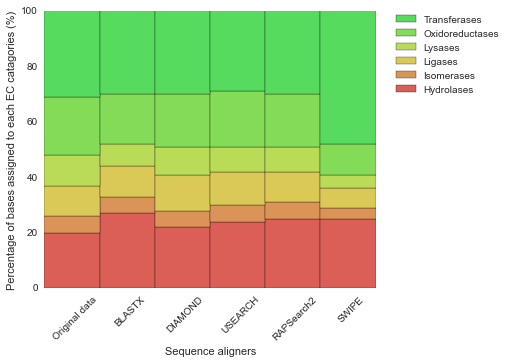

In [61]:

temp = {}

EC_to_name = {
    '1.-': 'Oxidoreductases',
    '2.-': 'Transferases',
    '3.-': 'Hydrolases',
    '4.-': 'Lysases',
    '5.-': 'Isomerases',
    '6.-': 'Ligases',    
}

for k,v in combined_perc.iteritems():
    temp[EC_to_name[k]] = v


dataframe = pd.DataFrame(temp)
ax = dataframe.plot(kind='bar',stacked=True,legend=True, ylim=(0,100),color=sns.color_palette("hls", 15), width = 1)

N = 6
ind = np.arange(N)
width = 0.1

    
plt.xlabel('Sequence aligners')
plt.ylabel('Percentage of genes assigned to each EC catagories (%)')
plt.xticks(ind+width/2 - 0.5,('Original data','BLASTX','DIAMOND','USEARCH','RAPSearch2','SWIPE'),rotation=45 )

handles, labels = ax.get_legend_handles_labels()


ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.gcf().subplots_adjust(right=0.7, bottom=0.2)
plt.autoscale()
plt.ylim(0,100)

plt.savefig('EC1_analysis.pdf',format='pdf',dpi=1000000000)

In [30]:
outputting = open('./EC_profiles_SimMeta_GeneNumbers_All.txt','w')


outputting.write('EC,true,Blast,Diamond,Usearch,Rapsearch2,SWIPE\n')
for i in swipeec.keys():
    if i in blastec.keys():
        if i in diamondec.keys():
            if i in usearchec.keys():
                if i in rapsearch2ec.keys():
                    if i in EC2_counts.keys():
                        blast = blastec[i]
                        diamond = diamondec[i]
                        usearch = usearchec[i]
                        rap = rapsearch2ec[i]
                        swipe = swipeec[i]
                        true = EC2_counts[i]
                        outputting.write(i + ',' + str(true) + ',' + str(blast)  + ',' + str(diamond)  + ',' + str(usearch) + ',' + str(rap)  + ',' + str(swipe) + '\n')

outputting.close()

In [28]:
rap

7809

In [56]:
import math
print math.ceil(4.2)

5.0
